In [25]:
import scipy.io as sio
from scipy.io import loadmat
import numpy as np

com_path = '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/2social_mini_20240910V1r_AO_single_12_50/labels/com_30_20250204_154658_Label3D_dannce.mat'
data = loadmat(com_path, struct_as_record=False, squeeze_me=True)


In [18]:
data2 = sio.loadmat(com_path)

In [19]:
data2

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Feb  4 20:25:50 2025',
 '__version__': '1.0',
 '__globals__': [],
 'labelData': array([[array([[(array([[ 970.94386997,  988.49659821, 1344.15438528,  295.85581692],
                        [1370.4686012 ,  404.12856033, 1320.13220551,  349.1045119 ],
                        [ 382.90351609, 1261.01413227,  909.81498067,  254.09401069],
                        [1241.03641717,  390.97516294, 1841.00760654,  465.99106175],
                        [1196.44519158,   31.60518894,  725.8476426 ,  326.36914472],
                        [2017.46537379,  818.92795168, 1332.44305316,  403.42132463],
                        [ 805.18180069,  352.07451989, 1683.57164753,  869.55473473],
                        [1707.45473209,  790.90881086, 1665.83528741,  724.22482916],
                        [1370.44130938, 1017.39962193, 1585.07464964,  843.16323746],
                        [ 977.3135719 ,   36.02725165, 1677.74807727,  47

labelData shape: (6,)
Frame numbers for Camera1: [  100   571  1000  2000  3333  4436  5464  6464  7464  8464  9464 10197
 11266 12448 13448 14448 15448 16818 17261 17448 18448 19341 20000 20999
 21999 22999 23999 24999 25999 26900]
Frame number: 100
Bounding box (interpreted as two points): [ 970.94386997  988.49659821 1344.15438528  295.85581692]
Animal 1 center: (970.9438699691941, 988.4965982109543)
Animal 2 center: (1344.15438527874, 295.85581692461994)


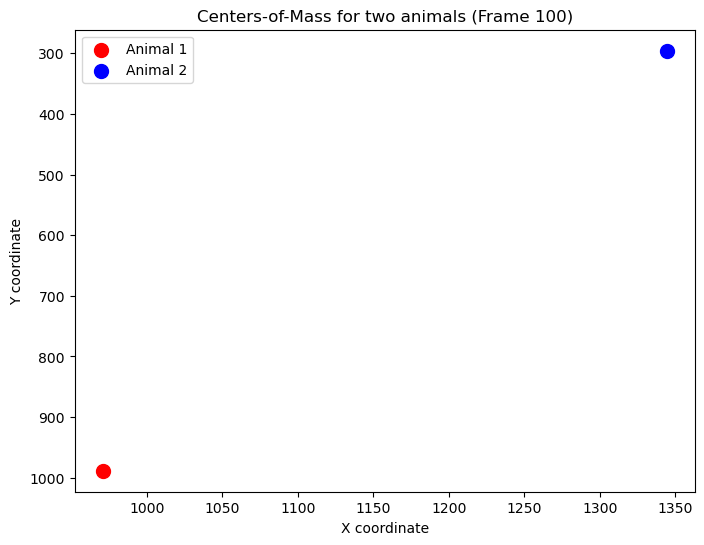

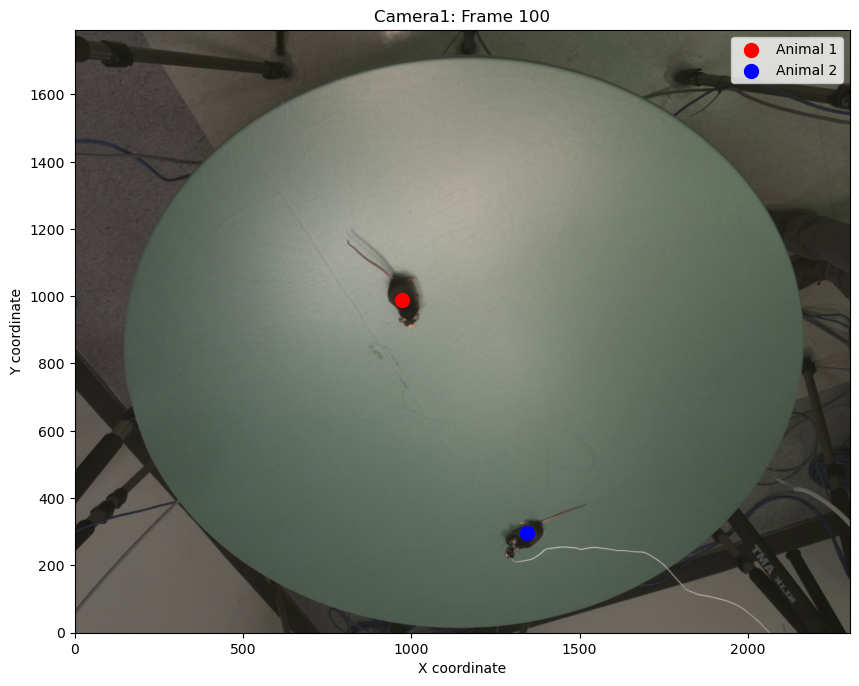

In [46]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the MAT file. (We use struct_as_record=False and squeeze_me=True to simplify the structure.)
com_path = '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/2social_mini_20240910V1r_AO_single_12_50/labels/com_30_20250204_154658_Label3D_dannce.mat'
data = sio.loadmat(com_path, struct_as_record=False, squeeze_me=True)

# 'labelData' is an array with one element per camera.
labelData = data['labelData']
print("labelData shape:", labelData.shape)

# Use only one camera (for example, Camera1)
cam = labelData[0]

# Print frame numbers for reference
print("Frame numbers for Camera1:", cam.data_frame)

# Choose the frame index you want (e.g. frame index 0 corresponds to frame number 100)
frame_idx = 0
frame_number = cam.data_frame[frame_idx]
print("Frame number:", frame_number)

# For this camera, the 2D label for each frame is a numeric array with 4 numbers:
# [x1, y1, x2, y2] where (x1, y1) and (x2, y2) are the two animal centers.
# Since cam.data_2d is already a 2D NumPy array of shape (num_frames, 4),
# simply extract the row corresponding to the frame of interest:
bbox = cam.data_2d[frame_idx, :]  # This is a 1D array with 4 numbers.
print("Bounding box (interpreted as two points):", bbox)

# Define the two points (animal centers)
animal1 = (bbox[0], bbox[1])
animal2 = (bbox[2], bbox[3])
print("Animal 1 center:", animal1)
print("Animal 2 center:", animal2)

# --- Plot on a blank figure ---
plt.figure(figsize=(8,6))
plt.scatter(animal1[0], animal1[1], s=100, color='red', label='Animal 1')
plt.scatter(animal2[0], animal2[1], s=100, color='blue', label='Animal 2')
plt.title("Centers-of-Mass for two animals (Frame {})".format(frame_number))
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.legend()
plt.gca().invert_yaxis()  # if your image origin is at the top-left
plt.show()

# --- Overlay the points on a video frame from Camera1 ---
video_path = "/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/2social_mini_20240910V1r_AO_single_12_50/videos/Camera1/0.mp4"
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Set the video to the desired frame number.
# (Make sure that cam.data_frame values correspond to video frame indices.)
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
ret, frame = cap.read()
if not ret:
    print("Error: Could not read frame", frame_number)
else:
    # Convert BGR (OpenCV) to RGB (matplotlib)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,8))
    plt.imshow(frame_rgb)
    plt.scatter(animal1[0], animal1[1], s=100, color='red', label='Animal 1')
    plt.scatter(animal2[0], animal2[1], s=100, color='blue', label='Animal 2')
    plt.title("Camera1: Frame {}".format(frame_number))
    plt.xlabel("X coordinate")
    plt.ylabel("Y coordinate")
    plt.legend()
    plt.gca().invert_yaxis()  # invert y-axis if needed
    plt.show()

cap.release()


In [47]:
import os
import glob
import numpy as np
import scipy.io as sio

# List of dictionaries for each dataset.
# (Add more entries as needed.)
datasets = [
    {
        'label3d_file': '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/2social_mini_20240910V1r_AO_single_12_50/labels/com_30_20250204_154658_Label3D_dannce.mat',
        'viddir': '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/2social_mini_20240910V1r_AO_single_12_50/videos'
    },
    {
        'label3d_file': '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_31/2social_mini_0605pmc_single_14_08/labels/com30_20250204_160309_Label3D_dannce.mat',
        'viddir': '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_31/2social_mini_0605pmc_single_14_08/videos'
    },
    {
        'label3d_file': '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_29/2social_mini_0605pmc_single_18_25/labels/com30_20250204_160052_Label3D_dannce.mat',
        'viddir': '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_29/2social_mini_0605pmc_single_18_25/videos'
    },
    {
        'label3d_file': '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/2male_mice_test_miniscope/labels/com30_20250204_155832_Label3D_dannce.mat',
        'viddir': '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/2male_mice_test_miniscope/videos'
    },
    {
        'label3d_file': '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_07/2social_mini_20241015pmcr2_single_AO_13_24/labels/com30_20250204_154906_Label3D_dannce.mat',
        'viddir': '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_07/2social_mini_20241015pmcr2_single_AO_13_24/videos'
    },
    {
        'label3d_file': '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_31/2social_mini_20240819V1r1_single_11_29/labels/com30_20250204_153612_Label3D_dannce.mat',
        'viddir': '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_31/2social_mini_20240819V1r1_single_11_29/videos'
    },
    # If you have more files, add them here.
]

# Loop over each dataset
for dataset in datasets:
    label3d_file = dataset.get('label3d_file')
    viddir = dataset.get('viddir')
    
    if not label3d_file or not os.path.exists(label3d_file):
        print(f"Label3D file does not exist: {label3d_file}")
        continue

    print(f"\nProcessing label file: {label3d_file}")
    
    try:
        # Load the .mat file.
        data = sio.loadmat(label3d_file, struct_as_record=False, squeeze_me=True)
    except Exception as e:
        print(f"  Error loading {label3d_file}: {e}")
        continue

    # Get the labelData structure.
    if 'labelData' not in data:
        print(f"  'labelData' not found in {label3d_file}")
        continue

    labelData = data['labelData']

    # For this example, we assume that each label file has an array for each camera
    # and we want to check Camera 1 (the first element, index 0).
    # (If you need to check all cameras, you can loop over the cameras in labelData.)
    cam = labelData[0]
    
    # The expected fields are:
    #   cam.data_frame: an array of frame numbers
    #   cam.data_2d: a 2D NumPy array with shape (num_frames, 4)
    if not hasattr(cam, 'data_2d') or not hasattr(cam, 'data_frame'):
        print("  The expected attributes ('data_2d' and 'data_frame') were not found.")
        continue

    data_2d = cam.data_2d  # shape (num_frames, 4)
    data_frame = cam.data_frame  # frame numbers (can be an array)

    # List to store the frame numbers where only one COM is labeled.
    frames_with_one_com = []

    # Loop over each frame.
    for idx in range(data_2d.shape[0]):
        bbox = data_2d[idx, :]  # [x1, y1, x2, y2]
        # Determine if each animal’s center is valid.
        # (Assuming a missing COM is indicated by a NaN value.)
        animal1_valid = not (np.isnan(bbox[0]) or np.isnan(bbox[1]))
        animal2_valid = not (np.isnan(bbox[2]) or np.isnan(bbox[3]))
        
        # Use XOR (exclusive OR) to check if exactly one of the COM is valid.
        if animal1_valid ^ animal2_valid:
            # Get the corresponding frame number (if available).
            frame_num = data_frame[idx] if data_frame.ndim > 0 else idx
            frames_with_one_com.append(frame_num)

    # Report the findings for the current file.
    if frames_with_one_com:
        print("  Frames with only one COM labeled:", frames_with_one_com)
    else:
        print("  All frames have either both COM labeled or none labeled.")



Processing label file: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/2social_mini_20240910V1r_AO_single_12_50/labels/com_30_20250204_154658_Label3D_dannce.mat
  All frames have either both COM labeled or none labeled.

Processing label file: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_31/2social_mini_0605pmc_single_14_08/labels/com30_20250204_160309_Label3D_dannce.mat
  All frames have either both COM labeled or none labeled.

Processing label file: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_29/2social_mini_0605pmc_single_18_25/labels/com30_20250204_160052_Label3D_dannce.mat
  Frames with only one COM labeled: [571]

Processing label file: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/2male_mice_test_miniscope/labels/com30_20250204_155832_Label3D_dannce.mat
  All frames have either both COM labeled or none labeled.

Processing label file: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_07/2social_mini_20241015pmcr2_single_AO_13_24/labels/com30_20250204_154906_Label3D_dannce.mat
  All frames

labelData shape: (6,)
Frame numbers for Camera1: [  101   572  1001  2001  3334  4437  5465  6465  7465  8465  9465 10198
 11267 12449 13449 14449 15449 16819 17262 17449 18449 19342 20001 21000
 22000 23000 24000 25000 26000 26901]
Frame number: 101
Bounding box (interpreted as two points): [1206.71073599 1116.74186902 1713.49290552  210.77348338]
Animal 1 center: (1206.7107359914603, 1116.7418690220827)
Animal 2 center: (1713.492905518373, 210.77348338082345)


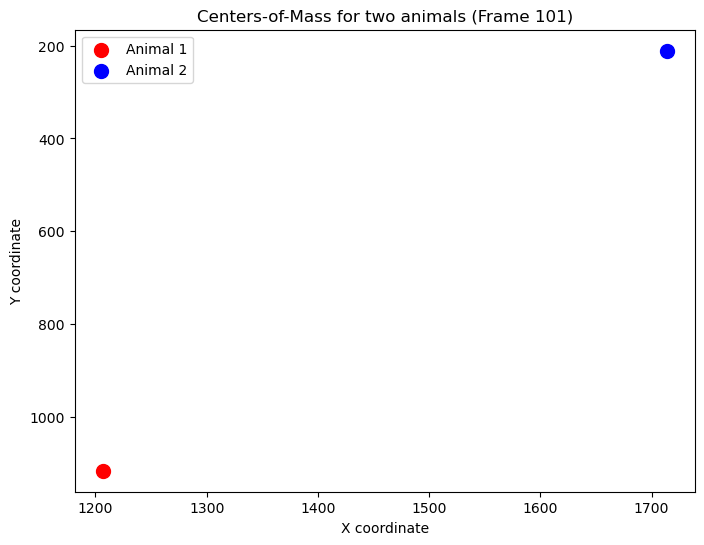

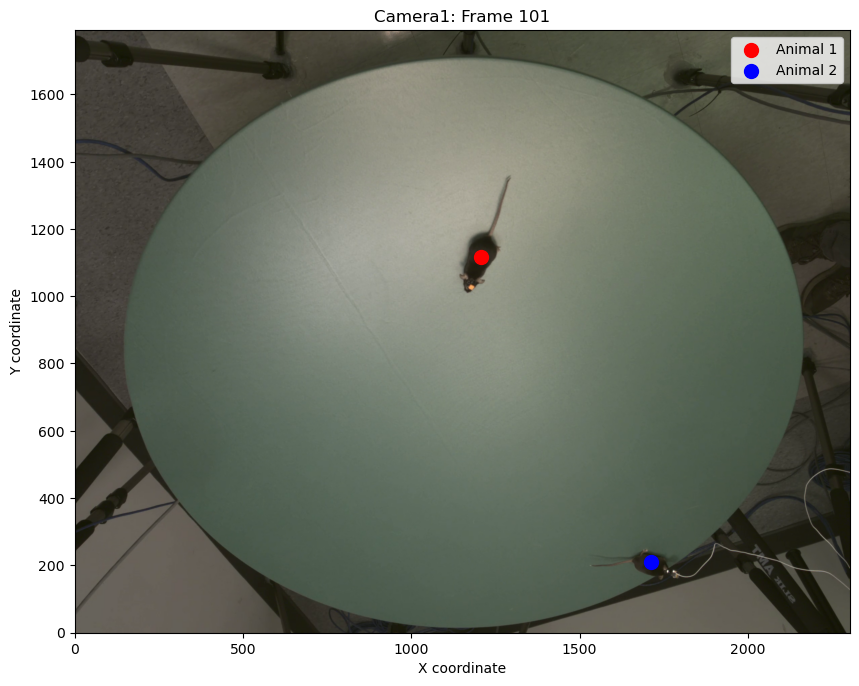

In [44]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the MAT file. (We use struct_as_record=False and squeeze_me=True to simplify the structure.)
# com_path = '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/2social_mini_20240910V1r_AO_single_12_50/labels/com_30_20250204_154658_Label3D_dannce.mat'
com_path = '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/2social_mini_20240910V1r_AO_single_12_50/labels/com30_20250204_153612_Label3D_dannce.mat'
data = sio.loadmat(com_path, struct_as_record=False, squeeze_me=True)

# 'labelData' is an array with one element per camera.
labelData = data['labelData']
print("labelData shape:", labelData.shape)

# Use only one camera (for example, Camera1)
cam = labelData[0]

# Print frame numbers for reference
print("Frame numbers for Camera1:", cam.data_frame)

# Choose the frame index you want (e.g. frame index 0 corresponds to frame number 100)
frame_idx = 0
frame_number = cam.data_frame[frame_idx]
print("Frame number:", frame_number)

# For this camera, the 2D label for each frame is a numeric array with 4 numbers:
# [x1, y1, x2, y2] where (x1, y1) and (x2, y2) are the two animal centers.
# Since cam.data_2d is already a 2D NumPy array of shape (num_frames, 4),
# simply extract the row corresponding to the frame of interest:
bbox = cam.data_2d[frame_idx, :]  # This is a 1D array with 4 numbers.
print("Bounding box (interpreted as two points):", bbox)

# Define the two points (animal centers)
animal1 = (bbox[0], bbox[1])
animal2 = (bbox[2], bbox[3])
print("Animal 1 center:", animal1)
print("Animal 2 center:", animal2)

# --- Plot on a blank figure ---
plt.figure(figsize=(8,6))
plt.scatter(animal1[0], animal1[1], s=100, color='red', label='Animal 1')
plt.scatter(animal2[0], animal2[1], s=100, color='blue', label='Animal 2')
plt.title("Centers-of-Mass for two animals (Frame {})".format(frame_number))
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.legend()
plt.gca().invert_yaxis()  # if your image origin is at the top-left
plt.show()

# --- Overlay the points on a video frame from Camera1 ---
video_path = '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_31/2social_mini_20240819V1r1_single_11_29/videos/Camera1/0.mp4' #"/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/2social_mini_20240910V1r_AO_single_12_50/videos/Camera1/0.mp4"
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Set the video to the desired frame number.
# (Make sure that cam.data_frame values correspond to video frame indices.)
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
ret, frame = cap.read()
if not ret:
    print("Error: Could not read frame", frame_number)
else:
    # Convert BGR (OpenCV) to RGB (matplotlib)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,8))
    plt.imshow(frame_rgb)
    plt.scatter(animal1[0], animal1[1], s=100, color='red', label='Animal 1')
    plt.scatter(animal2[0], animal2[1], s=100, color='blue', label='Animal 2')
    plt.title("Camera1: Frame {}".format(frame_number))
    plt.xlabel("X coordinate")
    plt.ylabel("Y coordinate")
    plt.legend()
    plt.gca().invert_yaxis()  # invert y-axis if needed
    plt.show()

cap.release()


labelData shape: (6,)
Frame numbers for Camera1: [  101   572  1001  2001  3334  4437  5465  6465  7465  8465  9465 10198
 11267 12449 13449 14449 15449 16819 17262 17449 18449 19342 20001 21000
 22000 23000 24000 25000 26000 26901]
Frame number: 101
Bounding box (interpreted as two points): [1206.71073599 1116.74186902 1713.49290552  210.77348338]
Animal 1 center: (1206.7107359914603, 1116.7418690220827)
Animal 2 center: (1713.492905518373, 210.77348338082345)


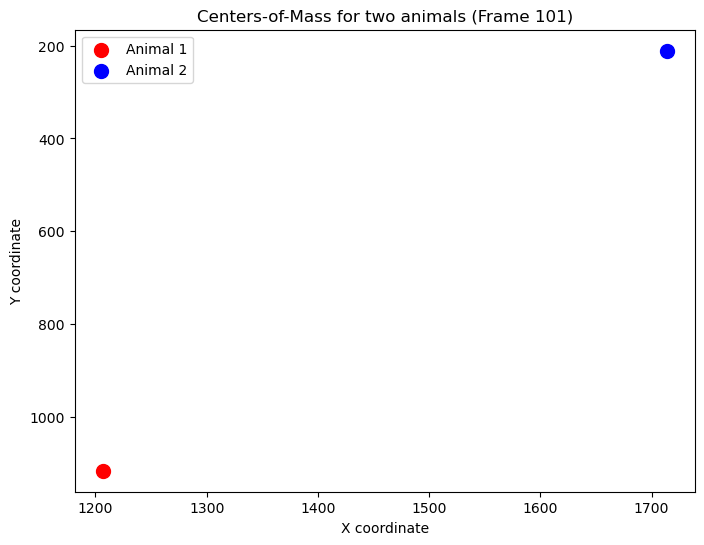

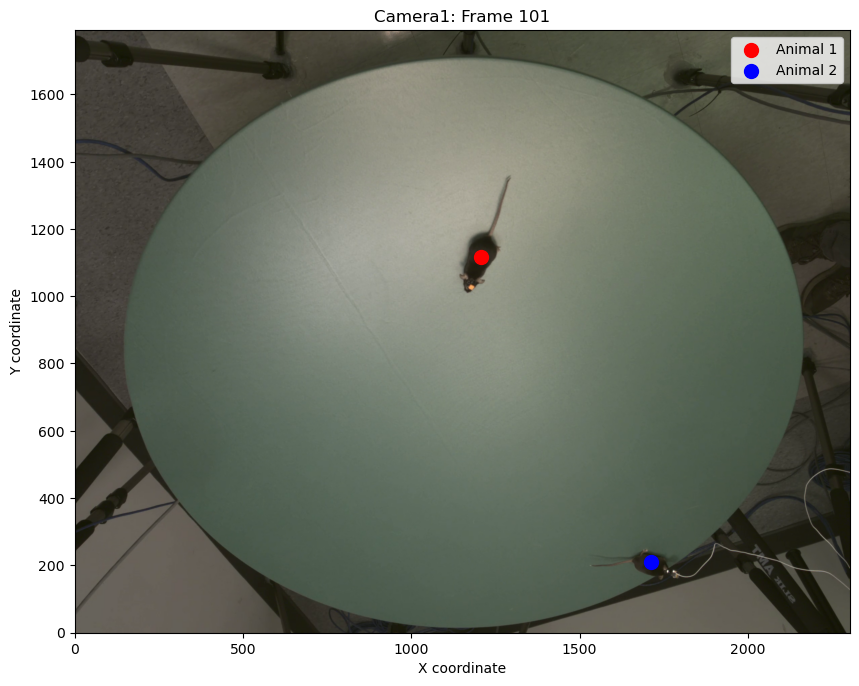

In [45]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the MAT file. (We use struct_as_record=False and squeeze_me=True to simplify the structure.)
com_path = '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_31/2social_mini_20240819V1r1_single_11_29/labels/com30_20250204_153612_Label3D_dannce.mat'
# '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/2social_mini_20240910V1r_AO_single_12_50/labels/com_30_20250204_154658_Label3D_dannce.mat'
data = sio.loadmat(com_path, struct_as_record=False, squeeze_me=True)

# 'labelData' is an array with one element per camera.
labelData = data['labelData']
print("labelData shape:", labelData.shape)

# Use only one camera (for example, Camera1)
cam = labelData[0]

# Print frame numbers for reference
print("Frame numbers for Camera1:", cam.data_frame)

# Choose the frame index you want (e.g. frame index 0 corresponds to frame number 100)
frame_idx = 0
frame_number = cam.data_frame[frame_idx]
print("Frame number:", frame_number)

# For this camera, the 2D label for each frame is a numeric array with 4 numbers:
# [x1, y1, x2, y2] where (x1, y1) and (x2, y2) are the two animal centers.
# Since cam.data_2d is already a 2D NumPy array of shape (num_frames, 4),
# simply extract the row corresponding to the frame of interest:
bbox = cam.data_2d[frame_idx, :]  # This is a 1D array with 4 numbers.
print("Bounding box (interpreted as two points):", bbox)

# Define the two points (animal centers)
animal1 = (bbox[0], bbox[1])
animal2 = (bbox[2], bbox[3])
print("Animal 1 center:", animal1)
print("Animal 2 center:", animal2)

# --- Plot on a blank figure ---
plt.figure(figsize=(8,6))
plt.scatter(animal1[0], animal1[1], s=100, color='red', label='Animal 1')
plt.scatter(animal2[0], animal2[1], s=100, color='blue', label='Animal 2')
plt.title("Centers-of-Mass for two animals (Frame {})".format(frame_number))
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.legend()
plt.gca().invert_yaxis()  # if your image origin is at the top-left
plt.show()

# --- Overlay the points on a video frame from Camera1 ---
video_path = '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_31/2social_mini_20240819V1r1_single_11_29/videos/Camera1/0.mp4'
# "/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/2social_mini_20240910V1r_AO_single_12_50/videos/Camera1/0.mp4"
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Set the video to the desired frame number.
# (Make sure that cam.data_frame values correspond to video frame indices.)
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
ret, frame = cap.read()
if not ret:
    print("Error: Could not read frame", frame_number)
else:
    # Convert BGR (OpenCV) to RGB (matplotlib)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,8))
    plt.imshow(frame_rgb)
    plt.scatter(animal1[0], animal1[1], s=100, color='red', label='Animal 1')
    plt.scatter(animal2[0], animal2[1], s=100, color='blue', label='Animal 2')
    plt.title("Camera1: Frame {}".format(frame_number))
    plt.xlabel("X coordinate")
    plt.ylabel("Y coordinate")
    plt.legend()
    plt.gca().invert_yaxis()  # invert y-axis if needed
    plt.show()

cap.release()


Number of cameras: (6,)
Frame numbers for camera: [  100   571  1000  2000  3333  4436  5464  6464  7464  8464  9464 10197
 11266 12448 13448 14448 15448 16818 17261 17448 18448 19341 20000 20999
 21999 22999 23999 24999 25999 26900]
Label data (first frame):
[ 970.94386997  988.49659821 1344.15438528  295.85581692]


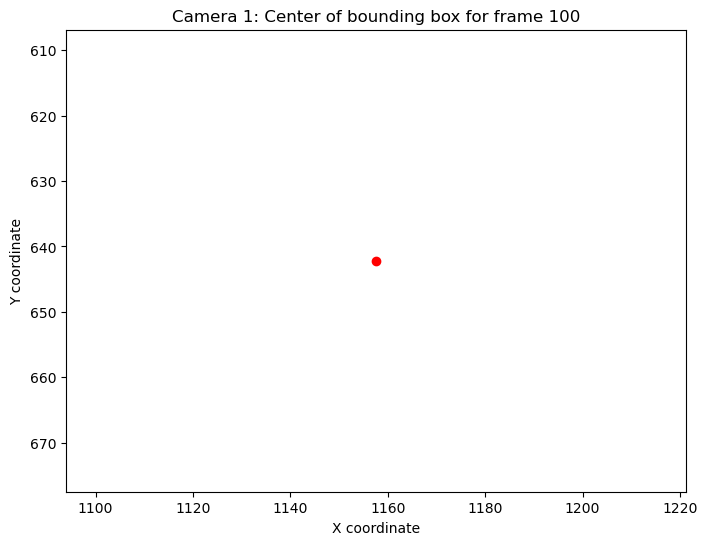

In [15]:
import matplotlib.pyplot as plt
# labeled_com# The loaded file contains several keys, including 'labelData'
labelData = data['labelData']
# If there are 6 cameras, labelData is now a 1D array (length 6), one per camera.
print("Number of cameras:", labelData.shape)

# Pick one camera (say the first one, index 0)
cam = labelData[0]
# (If you want a different camera, change the index accordingly.)

# Check the available fields:
#   cam.data_2d: the 2D label data (likely an array or list of arrays, one per labeled frame)
#   cam.data_frame: the corresponding frame numbers (for example, an array like [100, 571, 1000, ...])
print("Frame numbers for camera:", cam.data_frame)

# Pick the first labeled frame (index 0)
first_frame_number = cam.data_frame[0]
# Now extract the 2D label data for that frame.
# Depending on your file the indexing might be: data_2d is stored as a list or 1D array
first_frame_labels = cam.data_2d[0]
print("Label data (first frame):")
print(first_frame_labels)

# --- Plotting ---
# Here I assume that each row in first_frame_labels corresponds to a bounding box,
# with the format [x1, y1, x2, y2]. (In your printed data you see numbers like 970.94, 988.50, 1344.15, 295.86.)
# One way to visualize them is to compute the box centers and plot them.

# Check if the labels are for one box (1D) or multiple (2D)
if first_frame_labels.ndim == 1:
    # Single bounding box: compute the center
    center_x = (first_frame_labels[0] + first_frame_labels[2]) / 2.
    center_y = (first_frame_labels[1] + first_frame_labels[3]) / 2.
    centers = np.array([[center_x, center_y]])
else:
    # Multiple boxes: compute centers for each row
    centers = np.column_stack(((first_frame_labels[:, 0] + first_frame_labels[:, 2]) / 2,
                               (first_frame_labels[:, 1] + first_frame_labels[:, 3]) / 2))

# Now plot the center
plt.figure(figsize=(8,6))
plt.scatter(centers[:, 0], centers[:, 1], marker='o', color='red')
plt.title("Camera 1: Center of bounding box for frame " + str(first_frame_number))
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.gca().invert_yaxis()  # Invert y-axis if image origin is at the top
plt.show()

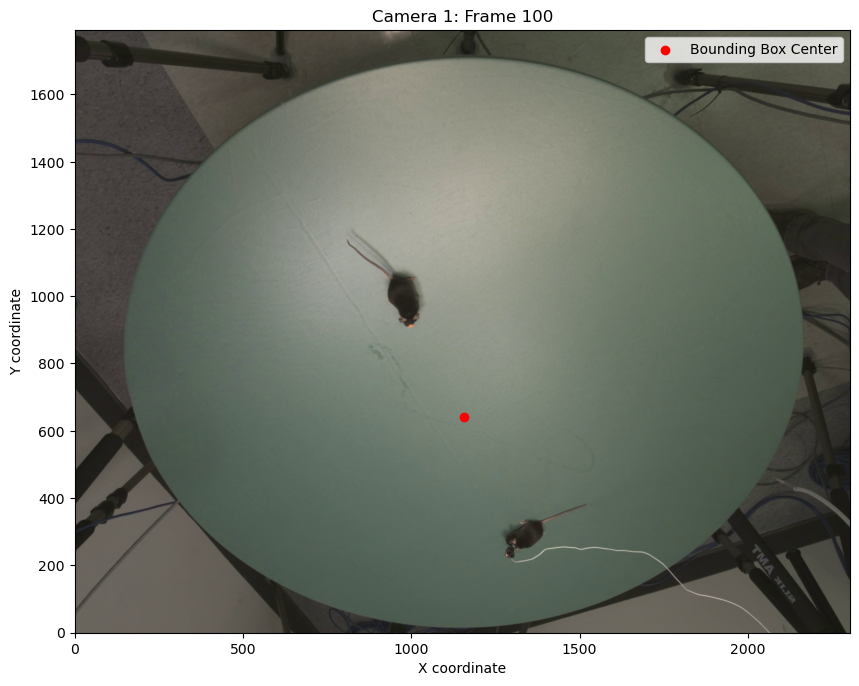

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the video file
video_path = "/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/2social_mini_20240910V1r_AO_single_12_50/videos/Camera1/0.mp4"


# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Get the frame number you want to read
target_frame_number = first_frame_number

# Set the video to the desired frame
cap.set(cv2.CAP_PROP_POS_FRAMES, target_frame_number)

# Read the frame
ret, frame = cap.read()

if not ret:
    print(f"Error: Could not read frame {target_frame_number}.")
else:
    # Convert the frame from BGR (OpenCV format) to RGB (for matplotlib)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Plot the frame with bounding box centers
    plt.figure(figsize=(10, 8))
    plt.imshow(frame_rgb)
    plt.scatter(centers[:, 0], centers[:, 1], marker='o', color='red', label='Bounding Box Center')
    plt.title(f"Camera 1: Frame {target_frame_number}")
    plt.xlabel("X coordinate")
    plt.ylabel("Y coordinate")
    plt.legend()
    plt.gca().invert_yaxis()  # Invert y-axis if needed
    plt.show()

# Release the video capture object
cap.release()

